In [1]:
import cPickle as pic
import numpy as np
import matplotlib.pyplot as plt
from Bio import Seq
import operator
import seaborn as sns
import pandas as pd

In [2]:
good_reads = pic.load(open("data/good_reads.pkl", "rb"))t
WT = "ATGGATGTATTCATGAAAGGACTTTCAAAGGCCAAGGAGGGAGTTGTGGCTGCTGCTGAGAAAACCAAACAGGGTGTGGCAGAAGCAGCAGGAAAGACAAAAGAGGGTGTTCTCTATGTAGGCTCCAAAACCAAGGAGGGAGTGGTGCATGGTGTGGCAACAGTGGCTGAGAAGACCAAAGAGCAAGTGACAAATGTTGGAGGAGCAGTGGTGACGGGTGTGACAGCAGTAGCCCAGAAGACAGTGGAGGGAGCAGGGAGCATTGCAGCAGCCACTGGCTTTGTCAAAAAGGACCAGTTGGGCAAGAATGAAGAAGGAGCCCCACAGGAAGGAATTCTGGAAGATATGCCTGTGGATCCTGACAATGAGGCTTATGAAATGCCTTCTGAGGAAGGGTATCAAGACTACGAACCTGAAGCC"

In [2]:
aa_num = pic.load(open("data/aminotonumber.pkl", "rb"))
print(aa_num)

{'A': 9, 'C': 8, 'E': 20, 'D': 19, 'G': 10, 'F': 2, 'I': 5, 'H': 16, 'K': 18, 'STOP': 0, 'M': 6, 'L': 4, 'N': 14, 'Q': 15, 'P': 11, 'S': 12, 'R': 17, 'T': 13, 'W': 1, 'V': 7, 'Y': 3}


In [6]:
mat = np.array([(1,2,3), (1,2,3)])
mat[np.where(mat==2)] = 0
print(mat)

[[1 0 3]
 [1 0 3]]


In [4]:
aa_pos_count = np.zeros((20, len(WT)/3))
aa_pos_count.shape

(20, 140)

In [5]:
def convert_to_aa(seq):
    return str(Seq.translate(seq))

In [8]:
wt_aa = convert_to_aa(WT)
print(wt_aa)

def get_mutations(seq1, seq2):
    ## Get list of mutations between seq1 and seq2, with seq1 as the reference (i.e. return 
    ## mutations in seq2)
    mutations = []
    for i in range(len(seq1)):
        # If we find a codon mutation, then we add a tuple entry to our list (pos, mutation)
        if seq1[i] != seq2[i] and seq2[i] != "*":
            mutations.append((i, seq2[i]))
    return mutations

MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKEGVVHGVATVAEKTKEQVTNVGGAVVTGVTAVAQKTVEGAGSIAAATGFVKKDQLGKNEEGAPQEGILEDMPVDPDNEAYEMPSEEGYQDYEPEA


In [9]:
for i in good_reads:
    seq = convert_to_aa(i[1])
    muts = get_mutations(wt_aa, seq)
    for m in muts:
        aa_pos_count[aa_num[m[1]]-1, m[0]] += 1

In [12]:
print(aa_pos_count)

[[   15103.    15945.    14820. ...,    13627.    14589.    13329.]
 [   36703.    39831.    40648. ...,   344929.  1105973.   160959.]
 [   28678.    28449.    27526. ...,    31483.    77772.  1309175.]
 ..., 
 [   56350.    51167.    50222. ...,    51852.    46884.    47340.]
 [   28649.        0.    26677. ...,    28267.    29984.    51604.]
 [   30474.    31450.    32106. ...,    31305.        0.    31641.]]


In [13]:
norm_factor = np.sum(aa_pos_count, axis=0)
norm_aa_pos_count = aa_pos_count / norm_factor

In [14]:
## Expected percent per amino acid at each position = 5% (1/20)

aa_mean_percent = np.mean(norm_aa_pos_count, 1)

# Bias = empirical mean - expectation
expectation = np.zeros((20,1)) + 0.05
bias = abs(aa_mean_percent - expectation.T) / 0.05
variance = (aa_mean_percent - expectation.T)**2

num_aa = sorted(aa_num, key=aa_num.get)[1:]
x = np.arange(20)

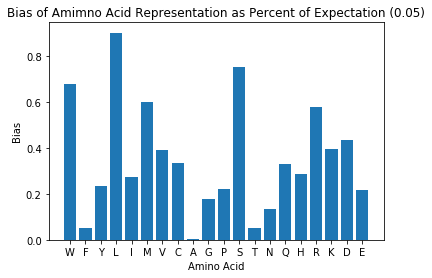

In [15]:
# Plot bias as function of amino acid

plt.bar(x, bias.T)
plt.title("Bias of Amimno Acid Representation as Percent of Expectation (0.05)")
plt.xlabel("Amino Acid")
plt.ylabel("Bias")
plt.xticks(x, num_aa)
plt.show()

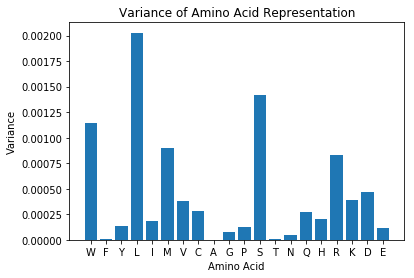

In [16]:
# Plot variance as function of amino acid 
# Plot bias as function of amino acid

plt.bar(x, variance.T)
plt.title("Variance of Amino Acid Representation")
plt.xlabel("Amino Acid")
plt.ylabel("Variance")
plt.xticks(x, num_aa)
plt.show()

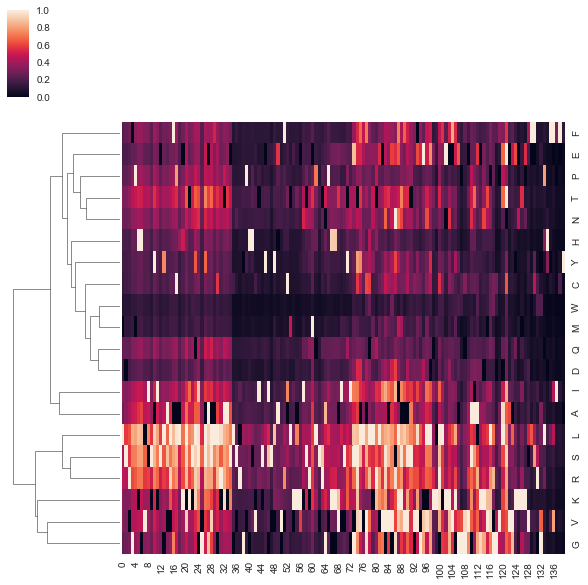

In [17]:
## Create heatmap of mutation frequencies
get_ipython().magic(u'matplotlib inline')

row_labels = num_aa

df = pd.DataFrame(aa_pos_count, index=row_labels)

sns.set(color_codes=True)
g = sns.clustermap(df, metric="euclidean", method="complete", col_cluster=False, standard_scale=1)
